📘 Análisis Exploratorio: Morbilidad por Infecciones Respiratorias Agudas Altas

Grupo 4 – Samsung Innovation Campus 2025

Docentes: Pedro Benites / Paul Morales

Integrantes:

- Luiz Ignacio Quineche Casana

- Jessica Amapola Serpa Buitrón

- Oscar Romero Mayta

- Wisner Ernan Valdiviezo Goicochea

- Angeli Flores Quito



# Carga de Datos morbilidad



### Contexto


El conjunto de datos proviene de la plataforma pública nacional de datos abiertos y está disponible públicamente en el siguiente enlace:

🔗 https://www.datosabiertos.gob.pe/dataset/morbilidad-infecciones-respiratorias-agudas-altas

Contiene las principales causas de morbilidad en consulta externa por infecciones respiratorias agudas altas CIE10 (J00-J06) según edad, sexo, tipo de edad y fecha de atención, registradas en los establecimientos de salud a nivel nacional.


A continuación se describen las variables disponibles en el dataset:

**id_persona:** Identificador único

**Edad:** Edad del paciente

**Tipo_edad:** Tipo de edad: AÑO, MES, DIA, HOR, MIN, SEG, SEM

**Sexo:** Sexo del paciente

**id_ubigeo:** identificador ubigeo

**Fecha_atención:** Fecha de atención

**Diagostico:** Código CIEX

**Tipo_Dx:** Tipo diagnóstico Definitivo, Presuntivo, Repetido

**id_eess:** Identificador establecimiento

In [1]:
import pandas as pd
df_tira = pd.read_csv('TB_IRA.csv', sep=';')

df_tira.head()


ModuleNotFoundError: No module named 'pandas'

In [ ]:
df_query = df_tira.query('id_persona == 39330428')
df_query

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
1921,39330428,9,M,M,618.0,20220422,J00X,D,4978


## Identificar valores nulos

In [ ]:
# Ver resumen general
df_tira.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374100 entries, 0 to 3374099
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id_persona      3374100 non-null  int64  
 1   Edad            3374100 non-null  int64  
 2   Tipo_edad       3374100 non-null  object 
 3   Sexo            3374100 non-null  object 
 4   id_ubigeo       3369896 non-null  float64
 5   Fecha_atencion  3374100 non-null  int64  
 6   Diagnostico     3374100 non-null  object 
 7   Tipo_Dx         3374100 non-null  object 
 8   id_eess         3374100 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 231.7+ MB


In [ ]:
# Ver columnas con valores nulos
print(df_tira.isnull().sum())

id_persona           0
Edad                 0
Tipo_edad            0
Sexo                 0
id_ubigeo         4204
Fecha_atencion       0
Diagnostico          0
Tipo_Dx              0
id_eess              0
dtype: int64


Observamos que el dataset cuenta con **3,374,100 registros (filas)** distribuidos en 9 columnas. Todas las columnas están completas, excepto 'id_ubigeo', la cual presenta 4,204 valores nulos.
A continuación, vamos a explorar en detalle cuales son dichos registros faltantes y verificar en qué filas se encuentran los valores nulos, para entender el posible motivo de la ausencia de datos.

In [ ]:
df_tira[df_tira.isnull().any(axis=1)]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
138,36184028,1,A,F,NaN,20210712,J00X,D,7436
139,40465084,1,M,M,NaN,20211103,J00X,D,5984
140,40460998,1,M,M,NaN,20211002,J00X,D,5984
142,40459515,1,M,M,NaN,20220623,J00X,D,5984
143,41289712,1,A,M,NaN,20230922,J00X,D,5984
...,...,...,...,...,...,...,...,...,...
3373707,40471619,15,D,M,NaN,20211130,J00X,D,21646
3374028,42318440,2,M,M,NaN,20240515,J00X,D,5944
3374065,42623647,3,M,M,NaN,20250220,J029,D,2099
3374095,42320407,4,A,F,NaN,20240530,J00X,D,6212


Eliminamos estas filas porque presentan valores nulos en la columna id_ubigeo, mientras que solo conservan datos en las demás columnas. Al no aportar información útil para el análisis, su presencia podría distorsionar cálculos estadísticos o visualizaciones posteriores.

In [ ]:
df_tira = df_tira.dropna()

Comprobamos que no queden valores nulos.

In [ ]:
df_tira.isnull().sum()

,0
id_persona,0
Edad,0
Tipo_edad,0
Sexo,0
id_ubigeo,0
Fecha_atencion,0
Diagnostico,0
Tipo_Dx,0
id_eess,0


##Identificar valores duplicados

In [ ]:
# Contar cuántos registros duplicados hay en el DataFrame
num_duplicados = df_tira.duplicated().sum()
print(f"Número de registros duplicados en el dataset: {num_duplicados}")


Número de registros duplicados en el dataset: 4510


In [ ]:
# mostrar los registros duplicados
df_tira[df_tira.duplicated()]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
953,38702053,4,A,F,40.0,20220127,J029,D,5152
1664,36187003,1,A,F,1130.0,20210123,J069,D,516
3461,36186450,1,M,F,1283.0,20210407,J00X,D,7436
4191,36191156,2,A,M,1449.0,20230103,J00X,D,6048
4405,38874378,5,A,F,1862.0,20230127,J068,D,5471
...,...,...,...,...,...,...,...,...,...
3369251,40206651,7,M,F,1313.0,20230429,J00X,D,6103
3369836,40374663,2,A,M,1862.0,20250110,J039,D,5479
3370088,40292734,3,M,M,1791.0,20230110,J00X,D,6293
3370555,33743239,8,A,F,809.0,20220620,J029,D,6180


La detección de 4,510 registros duplicados en el dataset sugiere la posible existencia de redundancias en la fuente de datos o errores en el proceso de integración. Si estos registros no aportan información adicional relevante, mantenerlos podría influir negativamente en los resultados del análisis, como conteos inflados o visualizaciones incorrectas. Por ello, su eliminación es una medida necesaria para garantizar la calidad y fiabilidad de los datos.






In [ ]:
df_tira = df_tira.drop_duplicates()

Comprobamos que no queden valores duplicados

In [ ]:
print("Duplicados después de limpieza:", df_tira.duplicated().sum())

Duplicados después de limpieza: 0


##Conversión de tipo de datos

Veamos nuevamente que tipos de datos tenemos por defecto en nuestro dataset

In [ ]:
df_tira.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3365386 entries, 0 to 3374099
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id_persona      3365386 non-null  int64  
 1   Edad            3365386 non-null  int64  
 2   Tipo_edad       3365386 non-null  object 
 3   Sexo            3365386 non-null  object 
 4   id_ubigeo       3365386 non-null  float64
 5   Fecha_atencion  3365386 non-null  int64  
 6   Diagnostico     3365386 non-null  object 
 7   Tipo_Dx         3365386 non-null  object 
 8   id_eess         3365386 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 256.8+ MB


A continuación, se visualizarán algunos registros con el fin de evaluar si el tipo de dato actual es adecuado o si es necesario realizar una conversión para facilitar el análisis y garantizar la coherencia en los valores.

In [ ]:
df_tira.head()

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,42317644,41,A,M,1281.0,20240530,J029,D,6189
1,39840888,12,A,M,1297.0,20220602,J00X,D,5797
2,38635412,12,A,F,1308.0,20220110,J029,D,5639
3,38722399,4,A,M,338.0,20220109,J029,D,1237
4,41260872,6,A,F,690.0,20240530,J00X,D,6245


**Revisión de tipos de datos**
*   Es correcto que 'Tipo_edad', 'Sexo', 'Diagnostico' y 'Tipo_Dx' sean de tipo object, ya que son datos categóricos.
*   También es correcto que 'Edad' sea un valor numérico (int).

**Vamos a convertir:**
*   'id_persona' a object.
*   'Fecha_atencion' a datatime.
*   'id_ubigeo' e 'id_eess'  a object, ya que solo funciona como identificador y no planeamos hacer cálculos matemáticos con él.

**Agregado**

*  En el caso de la columna **'Fecha_atencion'**, se propone crear variables derivadas como día, mes y año a partir de la fecha original, lo que permitirá un análisis más detallado y segmentado en función del tiempo




In [ ]:
# Convertir id_persona a object
df_tira['id_persona'] = df_tira['id_persona'].astype(str)

In [ ]:
# Convertir Fecha_atencion a datetime
df_tira['Fecha_atencion'] = pd.to_datetime(df_tira['Fecha_atencion'], format='%Y%m%d', errors='coerce')

In [ ]:
# Convertir id_ubigeo e id_eess a object
df_tira['id_ubigeo'] = pd.to_numeric(df_tira['id_ubigeo'], errors='coerce').astype('Int64')
df_tira['id_ubigeo'] = df_tira['id_ubigeo'].astype(str)
df_tira['id_eess'] = df_tira['id_eess'].astype(str)

In [ ]:
## Crear variables derivadas (día, mes, año)
df_tira['Año_atención'] = df_tira['Fecha_atencion'].dt.year
df_tira['Mes_atención'] = df_tira['Fecha_atencion'].dt.month
df_tira['Día_atención'] = df_tira['Fecha_atencion'].dt.day
#Eliminando fecha completa
df_tira.drop(columns=['Fecha_atencion'], inplace=True)

Verificamos la conversión de datos

In [ ]:
df_tira.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3365386 entries, 0 to 3374099
Data columns (total 11 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   id_persona    object
 1   Edad          int64 
 2   Tipo_edad     object
 3   Sexo          object
 4   id_ubigeo     object
 5   Diagnostico   object
 6   Tipo_Dx       object
 7   id_eess       object
 8   Año_atención  int32 
 9   Mes_atención  int32 
 10  Día_atención  int32 
dtypes: int32(3), int64(1), object(7)
memory usage: 269.6+ MB


In [ ]:
# Generar listas de variables cualitativas y cuantitativas
lista_cualitativas = list(df_tira.describe(include='object').columns)
lista_cuantitativas = list(df_tira.describe(include='number').columns)

print("📋 Variables cualitativas:", lista_cualitativas)
print("📊 Variables cuantitativas:", lista_cuantitativas)

📋 Variables cualitativas: ['id_persona', 'Tipo_edad', 'Sexo', 'id_ubigeo', 'Diagnostico', 'Tipo_Dx', 'id_eess']
📊 Variables cuantitativas: ['Edad', 'Año_atención', 'Mes_atención', 'Día_atención']


## Identificar valores inconsistentes

### Identificamos rangos de edad inconsistentes

In [ ]:
# Filas con edad negativa o exageradamente alta
edades_invalidas = df_tira[(df_tira['Edad'] < 0) | (df_tira['Edad'] > 120)]
print(f"⛔ Registros con edad fuera de rango: {len(edades_invalidas)}")
display(edades_invalidas.head())

⛔ Registros con edad fuera de rango: 10


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Diagnostico,Tipo_Dx,id_eess,Año_atención,Mes_atención,Día_atención
6101,36185495,-1,A,F,1869,J00X,D,5510,2021,3,5
2090284,41086054,-1,A,M,821,J029,D,3907,2023,3,3
2294277,42002583,-1,A,F,912,J00X,D,5392,2023,11,11
2894948,28026595,-1,A,M,1301,J029,D,6213,2021,2,15
3197804,39786385,-1,A,M,1080,J029,D,5811,2022,1,13


Corregimos y mantenemos la edad entre el rango

In [ ]:
# Mantener solo las edades válidas entre 0 y 120
df_tira = df_tira[(df_tira['Edad'] >= 0) & (df_tira['Edad'] <= 120)]

In [ ]:
# Filas con edad negativa o exageradamente alta
edades_invalidas = df_tira[(df_tira['Edad'] < 0) | (df_tira['Edad'] > 120)]
print(f"Registros con edad fuera de rango: {len(edades_invalidas)}")
display(edades_invalidas.head())

Registros con edad fuera de rango: 0


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Diagnostico,Tipo_Dx,id_eess,Año_atención,Mes_atención,Día_atención


### Identificamos rangos de ubigeos inconsistentes

**Objetivo**:
El DataFrame `df_tira` contiene millones de registros con un campo `id_ubigeo` inconsistente en longitud (entre 1 y 6 dígitos).
El objetivo es estandarizar todos los códigos a 6 dígitos, que es el formato oficial del INEI (DDPPDD), para permitir análisis geográficos consistentes.

**Estrategia**:
1. Detectar la longitud de cada código.
2. Aplicar funciones de corrección personalizadas según patrones comunes (1, 2, 3, 4 dígitos).
3. Validar que todos terminen con 6 dígitos al final del proceso.

####1. Análisis inicial de la longitud de los ubigeos

Antes de corregir, identificamos cuántos registros tienen 1, 2, 3, 4 o 6 dígitos. Esto nos permitirá priorizar los casos más frecuentes.




In [ ]:
# Crear una nueva columna con la longitud de cada valor
df_tira['longitud_ubigeo'] = df_tira['id_ubigeo'].apply(len)

# Contar cuántos hay de cada longitud
metricas_longitud = df_tira['longitud_ubigeo'].value_counts().sort_index()

# Mostrar el resultado
print("Cantidad de códigos por número de dígitos:")
print(metricas_longitud)

Cantidad de códigos por número de dígitos:
longitud_ubigeo
1       8583
2      94816
3    1132835
4    2129142
Name: count, dtype: int64


Esto reveló que la mayoría de registros tienen 3 y 4 dígitos. Comenzaremos por los de 4 dígitos, que son inconsistentes y numerosos.

Filtramos solo los que tienen exactamente 4 dígitos para un mejor análisis

In [ ]:
# Filtrar solo los que tienen exactamente 4 dígitos
ubigeos_4_digitos = df_tira[df_tira['id_ubigeo'].astype(str).str.len() == 4]

# Obtener valores únicos
valores_unicos_4d = ubigeos_4_digitos['id_ubigeo'].astype(str).unique()

# Ordenar y mostrar
valores_unicos_4d = sorted(valores_unicos_4d)
print(f"Número de códigos únicos de 4 dígitos: {len(valores_unicos_4d)}")
print(valores_unicos_4d)

Número de códigos únicos de 4 dígitos: 891
['1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '1110', '1111', '1112', '1113', '1114', '1115', '1116', '1117', '1118', '111

####2. Corrección de códigos de 4 dígitos

Corregimos códigos con longitud 4 aplicando reglas personalizadas observadas en los datos. Se define una función para transformarlos según su patrón.


In [ ]:
# Función principal para corregir códigos de 4 dígitos
def reparar_ubigeo_4_digitos_primer_barrido(ubi):
    """
    Corrige códigos de ubigeo de 4 dígitos según patrones observados:
    - 1000 → 100101 (caso especial)
    - d == '0' → termina en cero
    - b == '0' → cero en posición 1
    - Caso general → estructura intercalada
    """
    ubi = str(ubi)
    if len(ubi) != 4:
        return ubi  # No aplica

    # CASO ESPECIAL: exactamente 1000 → 100101
    if ubi == '1000':
        return '100101'

    a, b, c, d = ubi[0], ubi[1], ubi[2], ubi[3]


    # CASO 1: b == '0' y c, d no son ceros
    if b == '0' and c != '0' and d != '0':
      return  a + b + '0' + c + '0' + d  # Ej: 1023 → 100203
    # CASO 2: c == '0' y b, d no son ceros
    if c == '0' and b != '0' and d != '0':
      return a + b + '01' + c + d  # Ejemplo: 1304 → 130004 (ficticio
    # CASO 3: d == '0' y b, c no son ceros
    if d == '0' and b != '0' and c != '0':
      return a + b  + c + d + '01'  # Como ya haces: 1870 → 180701
   # CASO GENERAL: aplicar solo si b, c, d son distintos de '0'
    if '0' not in [b, c, d]:
      return a + b + '0' + c + '0' + d  # Ej: 1871 → 180701
    # Si contiene más de un cero, o no cumple patrón → devolver original
    return ubi


Aplicamos la función y comparamos los resultados corregidos.



In [ ]:
# Crear una nueva columna con los corregidos
df_tira['id_ubigeo_corregido'] = df_tira['id_ubigeo'].apply(reparar_ubigeo_4_digitos_primer_barrido)

# 3. Mostrar los que fueron efectivamente modificados
corregidos_4d = df_tira[
    (df_tira['id_ubigeo'].str.len() == 4) &
    (df_tira['id_ubigeo'] != df_tira['id_ubigeo_corregido'])
]

print("✅ Ubigeos de 4 dígitos corregidos:\n")
display(corregidos_4d[['id_ubigeo', 'id_ubigeo_corregido']].drop_duplicates())
corregidos_unicos = corregidos_4d[['id_ubigeo', 'id_ubigeo_corregido']].drop_duplicates()

# 4. (Opcional) Reemplazar la columna original directamente
df_tira['id_ubigeo'] = df_tira['id_ubigeo_corregido']


✅ Ubigeos de 4 dígitos corregidos:



,id_ubigeo,id_ubigeo_corregido
0,1281,120801
1,1297,120907
2,1308,130108
6,1207,120107
7,1692,160902
...,...,...
645893,1892,180902
797491,1890,189001
811551,1882,180802
981486,1891,180901


Esta etapa corrige miles de registros que tenían valores intermedios sin estructura geográfica clara.



 #### 3. Corrección de códigos de 3 dígitos

Ahora abordamos los casos con 3 dígitos, aplicando otra función personalizada.



In [ ]:

def reparar_ubigeo_3_digitos(ubi):
    """
    Corrige códigos de ubigeo de 3 dígitos (como '345' → '030405').
    - Si termina en '0' → no se corrige.
    - Si el dígito del medio es '0' (como '401') → se convierte en '0a01c'.
    - Si todos los dígitos son distintos de '0' → se convierte en '0a0b0c'.
    """
    ubi = str(ubi)

    if len(ubi) != 3:
        return ubi

    if ubi.endswith('0'):
        return ubi

    if ubi[1] == '0':
        return '0' + ubi[0] + '010' + ubi[2]  # Ej: 401 → 040101

    if ubi[1] != '0':
        return '0' + ubi[0] + '0' + ubi[1] + '0' + ubi[2]  # Ej: 345 → 030405

    return ubi


Aplicamos la función y comparamos los resultados corregidos.

In [ ]:
#  Generar una nueva columna para comparar
df_tira['id_ubigeo_corregido'] = df_tira['id_ubigeo'].apply(reparar_ubigeo_3_digitos)

# Reemplazar la columna original
df_tira['id_ubigeo'] = df_tira['id_ubigeo'].apply(reparar_ubigeo_3_digitos)


#### 4. Reparación general para todos los casos


Verificamos valores únicos para un mejor análisis

In [ ]:
#yaaaCrear una nueva columna con la longitud de cada valor
df_tira['longitud_ubigeo'] = df_tira['id_ubigeo'].apply(len)

# Contar cuántos hay de cada longitud
metricas_longitud = df_tira['longitud_ubigeo'].value_counts().sort_index()

# Mostrar el resultado
print("Cantidad de códigos por número de dígitos:")
print(metricas_longitud)


Cantidad de códigos por número de dígitos:
longitud_ubigeo
1       8583
2      94816
3     125073
4      46739
6    3090165
Name: count, dtype: int64


In [ ]:
# Para longitud 1
print("Valores únicos con longitud 1:")
print(df_tira[df_tira['longitud_ubigeo'] == 1]['id_ubigeo'].unique())

# Para longitud 2
print("\nValores únicos con longitud 2:")
print(df_tira[df_tira['longitud_ubigeo'] == 2]['id_ubigeo'].unique())

# Para longitud 3
print("\nValores únicos con longitud 3:")
print(df_tira[df_tira['longitud_ubigeo'] == 3]['id_ubigeo'].unique())
# Para longitud 4
print("\nValores únicos con longitud 4:")
print(df_tira[df_tira['longitud_ubigeo'] == 4]['id_ubigeo'].unique())

Valores únicos con longitud 1:
['8' '3' '6' '1' '9' '7' '4' '5' '2']

Valores únicos con longitud 2:
['26' '40' '42' '79' '78' '74' '63' '94' '41' '59' '23' '44' '67' '83'
 '51' '84' '24' '47' '80' '14' '54' '56' '39' '22' '72' '66' '10' '89'
 '31' '55' '57' '70' '13' '85' '28' '69' '45' '71' '34' '73' '82' '27'
 '97' '77' '88' '81' '49' '33' '12' '11' '15' '62' '64' '35' '60' '16'
 '21' '76' '93' '68' '61' '65' '75' '52' '87' '43' '18' '20' '58' '90'
 '36' '92' '98' '96' '19' '53' '50' '99' '38' '48' '37' '91' '86' '46'
 '95' '25' '32' '17' '29' '30']

Valores únicos con longitud 3:
['690' '700' '780' '800' '610' '650' '490' '770' '430' '170' '380' '350'
 '970' '910' '480' '790' '310' '140' '260' '930' '570' '990' '710' '390'
 '980' '590' '360' '370' '200' '210' '940' '520' '230' '750' '470' '300'
 '460' '100' '340' '250' '180' '240' '740' '400' '640' '950' '270' '920'
 '860' '450' '290' '670' '810' '900' '620' '840' '280' '540' '130' '500'
 '850' '150' '510' '830' '160' '880' '600' '

Definimos una función general que se puede aplicar a cualquier longitud, incluyendo casos con 1, 2, 3 y 4 dígitos, más allá de los patrones simples.

In [ ]:
def reparar_ubigeo_general(ubi):
    ubi = str(ubi)

    # CASOS DE 1 DÍGITO
    if len(ubi) == 1:
        return '0' + ubi + '0101'

    # CASOS DE 2 DÍGITOS
    elif len(ubi) == 2:
        valor = int(ubi)
        if valor <= 25:
            return ubi + '0101'
        elif ubi.endswith('0') and ubi[0] != '0':
            return '010' + ubi[0] + '01'
        elif '0' not in ubi:
            return '010' + ubi[0] + '0' + ubi[1]
        else:
            return ubi

    # CASOS DE 3 DÍGITOS
    elif len(ubi) == 3:
        if ubi == '690':
            return '070101'
            # Caso especial: si termina en '00' → insertar ceros y '1's → Ej: '300' → '030101'
        elif ubi[1:] == '00':
            return '0' + ubi[0] + '01' + '01'
        elif ubi.endswith('0') and '0' not in ubi[:2]:
            return '0' + ubi[0] + '0' + ubi[1] + '01'
        elif '0' not in ubi:
            return '0' + ubi[0] + '0' + ubi[1] + '0' + ubi[2]
        else:
            return ubi

    # CASOS DE 4 DÍGITOS
    elif len(ubi) == 4:
        a, b, c, d = ubi[0], ubi[1], ubi[2], ubi[3]

        if ubi.startswith('100') and d in '123456789':
            return '100' + d + '01'
        if ubi.startswith('10') and d == '0' and c in '123456789':
            return '100' + c + '01'
        if d == '0' and c == '0' and b != '0':
            return a + b + '0101'
        return ubi

    # Si ya tiene 6 dígitos, lo dejamos igual
    elif len(ubi) == 6:
        return ubi

    # Otro caso no considerado
    else:
        return ubi


Esta etapa permite cubrir casos no contemplados en las funciones anteriores, garantizando una limpieza robusta.

In [ ]:
# Aseguramos que todo sea texto antes de aplicar
df_tira['id_ubigeo'] = df_tira['id_ubigeo'].astype(str)

# Guardamos copia original por si quieres comparar luego
df_tira['id_ubigeo_original'] = df_tira['id_ubigeo']

# Aplicamos la reparación
df_tira['id_ubigeo'] = df_tira['id_ubigeo'].apply(reparar_ubigeo_general)

# Recalcular longitud para verificar si todo quedó con 6 dígitos
df_tira['longitud_ubigeo'] = df_tira['id_ubigeo'].apply(len)

# Mostrar métricas finales
print("Distribución final de longitudes:")
print(df_tira['longitud_ubigeo'].value_counts().sort_index())

# Mostrar si queda algún error (≠ 6)
errores = df_tira[df_tira['longitud_ubigeo'] != 6]
print(f"\nErrores encontrados: {len(errores)}")
if not errores.empty:
    print("Ejemplos con longitud incorrecta:")
    print(errores[['id_ubigeo_original', 'id_ubigeo', 'longitud_ubigeo']].head())

Distribución final de longitudes:
longitud_ubigeo
6    3365376
Name: count, dtype: int64

Errores encontrados: 0


####5. Limpieza de columnas auxiliares

Eliminamos las columnas temporales que ya no son necesarias, dejando el DataFrame limpio.



In [ ]:
df_tira.drop(columns=['longitud_ubigeo', 'id_ubigeo_corregido', 'id_ubigeo_original'], inplace=True)


# Carga de Establecimientos de Salud (EESS)

**Dataset:** Establecimientos de Salud RENIPRESS – Perú

**Fuente:** https://datosabiertos.gob.pe/dataset/establecimientos-de-salud/resource/24219766-94bc-459e-91c9-77cee00a4726

**Descripción:** Contiene información detallada de 23,656 establecimientos de salud registrados a nivel nacional, incluyendo código RENAES, categoría, dirección y coordenadas geográficas para visualización geoespacial.

**Usos:** Este dataset es clave para representar geográficamente los EESS en mapas interactivos y realizar análisis exploratorios (EDA) por ubicación, categoría, red o región sanitaria.

**Campos clave:**

- **id_eess:** Identificador del establecimiento

- **codigo_renaes:** Código único del RENIPRESS

- **categoria:** Nivel del establecimiento (Ej. I-3, II-2)

- **nombre:** Nombre del establecimiento

- **diresa, red:** Información administrativa

- **direccion: Texto** completo de ubicación

- **latitud, longitud:** Coordenadas para geolocalización

- **id_ubigeo:** Puntero al código territorial del INEI

In [ ]:
df_eess = pd.read_csv('/content/TB_EESS.csv', sep=';')

In [ ]:
df_eess.head()


,id_eess,codigo_renaes,categoria,nombre,diresa,red,direccion,longitud,latitud,id_ubigeo
0,1,1,II-2,"HOSPITAL IQUITOS ""CESAR GARAYAR GARCÍA""",LORETO,NO PERTENECE A NINGUNA RED,AVENIDA GRAU CON LIBERTAD NUMERO S/N DISTRITO ...,"-73,2538901","-3,7616779",1453.0
1,2,2,SD,CENTRO REHABILITACION ENFERMO MENTAL,LORETO,NO PERTENECE A NINGUNA RED,CALLE 3 DE MAYO S/N CPM QUILCATACTA,NaN,NaN,1463.0
2,3,3,III-1,"HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO A...",LORETO,NO PERTENECE A NINGUNA RED,AVENIDA AVENIDA 28 DE JULIO S/N S/N AVENIDA 28...,"-73,25341698","-3,72696048",1460.0
3,4,4,I-3,C.S. I-3 SANTA MARIA DE NANAY,LORETO,MAYNAS CIUDAD,OTROS CASERIO DE SANTA MARIA DE NANAY DISTRITO...,"-73,69678536","-3,88899772",1454.0
4,5,5,I-1,SAMITO,LORETO,MAYNAS CIUDAD,OTROS CASERIO DE SAMITO SIN NUMERO DISTRITO AL...,"-73,61092844","-3,86516692",1454.0


Revisar la estructura, tipos de datos y registros nulos del dataset


In [ ]:
df_eess.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34391 entries, 0 to 34390
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_eess        34391 non-null  int64  
 1   codigo_renaes  34391 non-null  int64  
 2   categoria      34391 non-null  object 
 3   nombre         34391 non-null  object 
 4   diresa         34387 non-null  object 
 5   red            34391 non-null  object 
 6   direccion      34258 non-null  object 
 7   longitud       21112 non-null  object 
 8   latitud        21112 non-null  object 
 9   id_ubigeo      34382 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


## 1. Limpieza de coordenadas geográficas

Las columnas `latitud` y `longitud` contenían valores con comas como separador decimal (formato regional).
Esto impide procesar correctamente los datos como números reales.
Por ello, se reemplazaron las comas por puntos y luego se convirtieron los valores a tipo `float`.
Esto permite posteriormente representar los establecimientos en gráficos geoespaciales.

In [ ]:
# Reemplazar las comas por puntos en las columnas latitud y longitud
df_eess['latitud'] = df_eess['latitud'].str.replace(',', '.', regex=False).astype(float)
df_eess['longitud'] = df_eess['longitud'].str.replace(',', '.', regex=False).astype(float)

# Verificar los primeros registros para asegurarnos de que las coordenadas están correctas
print(df_eess[['latitud', 'longitud']].head())

    latitud   longitud
0 -3.761678 -73.253890
1       NaN        NaN
2 -3.726960 -73.253417
3 -3.888998 -73.696785
4 -3.865167 -73.610928


##  2. Conversión de identificadores a string
Las columnas `id_eess` y `codigo_renaes` son claves de identificación, por lo que se convierten a tipo `string`.
Esto facilita tareas como fusiones (`merge`), agrupamientos (`groupby`) y exportaciones sin errores de formato.

In [ ]:
df_eess['id_eess'] = df_eess['id_eess'].astype(str)  # Convertir a str
df_eess['codigo_renaes'] = df_eess['codigo_renaes'].astype(str)  # Convertir a str



## 3. Eliminación de registros sin coordenadas
Los registros que no tienen `latitud` o `longitud` no son útiles para análisis geoespacial, por lo que se eliminan.
Este paso asegura que los mapas interactivos o gráficos de distribución se basen en datos válidos y completos.


In [ ]:
df_eess = df_eess.dropna(subset=['latitud', 'longitud'])

## 4. Verificación visual de coordenadas
Se muestran los primeros registros de `latitud` y `longitud` para confirmar que los valores fueron limpiados correctamente
y se encuentran en formato numérico decimal.

In [ ]:
df_eess.head()

,id_eess,codigo_renaes,categoria,nombre,diresa,red,direccion,longitud,latitud,id_ubigeo
0,1,1,II-2,"HOSPITAL IQUITOS ""CESAR GARAYAR GARCÍA""",LORETO,NO PERTENECE A NINGUNA RED,AVENIDA GRAU CON LIBERTAD NUMERO S/N DISTRITO ...,-73.253890,-3.761678,1453.0
2,3,3,III-1,"HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO A...",LORETO,NO PERTENECE A NINGUNA RED,AVENIDA AVENIDA 28 DE JULIO S/N S/N AVENIDA 28...,-73.253417,-3.726960,1460.0
3,4,4,I-3,C.S. I-3 SANTA MARIA DE NANAY,LORETO,MAYNAS CIUDAD,OTROS CASERIO DE SANTA MARIA DE NANAY DISTRITO...,-73.696785,-3.888998,1454.0
4,5,5,I-1,SAMITO,LORETO,MAYNAS CIUDAD,OTROS CASERIO DE SAMITO SIN NUMERO DISTRITO AL...,-73.610928,-3.865167,1454.0
5,6,6,I-1,P.S. 1 DIAMANTE AZUL,LORETO,MAYNAS CIUDAD,OTROS CASERIO DE DIAMANTE AZUL DISTRITO ALTO N...,-73.779670,-3.901314,1454.0


In [ ]:
df_eess.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 21112 entries, 0 to 34257
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_eess        21112 non-null  object 
 1   codigo_renaes  21112 non-null  object 
 2   categoria      21112 non-null  object 
 3   nombre         21112 non-null  object 
 4   diresa         21112 non-null  object 
 5   red            21112 non-null  object 
 6   direccion      21112 non-null  object 
 7   longitud       21112 non-null  float64
 8   latitud        21112 non-null  float64
 9   id_ubigeo      21103 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB



# Carga de Datos Ubigeo - INEI


Fuente: https://account.geodir.co/recursos/ubigeo-inei-peru.html

Descripción:
Este dataset contiene los códigos de ubicación geográfica (Ubigeo) a nivel de distrito, provincia y departamento del Perú,
incluyendo información clave como la población, superficie territorial y coordenadas geográficas (X, Y) de cada distrito.

Uso:
Se utiliza como tabla de referencia para relacionar registros con información geográfica estructurada,
permitiendo visualizaciones, agrupaciones y análisis a nivel territorial.

Campos clave:
- **Ubigeo**: Código INEI (6 dígitos: 2 para departamento, 2 para provincia, 2 para distrito)
- **Distrito, Provincia, Departamento:** Jerarquía territorial
- **Poblacion**: Población del distrito
- **Superficie**: Área territorial en km²
- **Y**, **X**: Coordenadas geográficas del distrito (latitud, longitud)

In [ ]:
# Cargar el archivo Excel
df_ubigeo = pd.read_excel('/content/geodir-ubigeo-inei.xlsx')

# Mostrar las primeras filas del DataFrame cargado
display(df_ubigeo.head(100
                ))

,Ubigeo,Distrito,Provincia,Departamento,Poblacion,Superficie,Y,X
0,10101,Chachapoyas,Chachapoyas,Amazonas,29171,153.78,-6.2294,-77.8714
1,10102,Asuncion,Chachapoyas,Amazonas,288,25.71,-6.0317,-77.7122
2,10103,Balsas,Chachapoyas,Amazonas,1644,357.09,-6.8375,-78.0214
3,10104,Cheto,Chachapoyas,Amazonas,591,56.97,-6.2558,-77.7003
4,10105,Chiliquin,Chachapoyas,Amazonas,687,143.43,-6.0778,-77.7392
...,...,...,...,...,...,...,...,...
95,20112,Tarica,Huaraz,Ancash,5936,110.28,-9.3919,-77.5769
96,20201,Aija,Aija,Ancash,1841,159.74,-9.7819,-77.6114
97,20202,Coris,Aija,Ancash,2270,267.15,-9.8211,-77.7225
98,20203,Huacllan,Aija,Ancash,628,37.91,-9.7975,-77.6747


 Revisar la estructura, tipos de datos y registros nulos del dataset


In [ ]:
df_ubigeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ubigeo        1874 non-null   int64  
 1   Distrito      1874 non-null   object 
 2   Provincia     1874 non-null   object 
 3   Departamento  1874 non-null   object 
 4   Poblacion     1874 non-null   int64  
 5   Superficie    1874 non-null   float64
 6   Y             1874 non-null   float64
 7   X             1874 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 117.3+ KB


##1. Conversión del código de Ubigeo a cadena de texto

El campo `Ubigeo` es un identificador territorial que debe tratarse como texto (string),
ya que no representa una cantidad numérica. Esta conversión permite asegurar que
los ceros a la izquierda (en algunos códigos) se mantengan y se pueda comparar correctamente.

In [ ]:
df_ubigeo['Ubigeo'] = df_ubigeo['Ubigeo'].astype(str)


##2. Verificación de la longitud de los códigos Ubigeo

In [ ]:
# Crear una nueva columna con la longitud de cada valor
df_ubigeo['lon_ubigeo'] = df_ubigeo['Ubigeo'].apply(len)

# Contar cuántos hay de cada longitud
metricas_longitud = df_ubigeo['lon_ubigeo'].value_counts().sort_index()

# Mostrar el resultado
print("Cantidad de códigos por número de dígitos:")
print(metricas_longitud)

Cantidad de códigos por número de dígitos:
lon_ubigeo
5    908
6    966
Name: count, dtype: int64


Se detectan códigos con longitud 5, lo cual indica que les falta un '0' al inicio.
Esto puede ocurrir cuando Excel o pandas interpreta estos valores como números.

## 3.Corrección de Ubigeos incompletos (relleno con 0 a la izquierda)

In [ ]:

# Filtrar los que tienen longitud 5 y mostrar los Ubigeo únicos
print("\nValores únicos con longitud 5:")
print(df_ubigeo[df_ubigeo['lon_ubigeo'] == 5]['Ubigeo'].unique())


Valores únicos con longitud 5:
['10101' '10102' '10103' '10104' '10105' '10106' '10107' '10108' '10109'
 '10110' '10111' '10112' '10113' '10114' '10115' '10116' '10117' '10118'
 '10119' '10120' '10121' '10201' '10202' '10203' '10204' '10205' '10206'
 '10301' '10302' '10303' '10304' '10305' '10306' '10307' '10308' '10309'
 '10310' '10311' '10312' '10401' '10402' '10403' '10501' '10502' '10503'
 '10504' '10505' '10506' '10507' '10508' '10509' '10510' '10511' '10512'
 '10513' '10514' '10515' '10516' '10517' '10518' '10519' '10520' '10521'
 '10522' '10523' '10601' '10602' '10603' '10604' '10605' '10606' '10607'
 '10608' '10609' '10610' '10611' '10612' '10701' '10702' '10703' '10704'
 '10705' '10706' '10707' '20101' '20102' '20103' '20104' '20105' '20106'
 '20107' '20108' '20109' '20110' '20111' '20112' '20201' '20202' '20203'
 '20204' '20205' '20301' '20302' '20303' '20304' '20305' '20306' '20401'
 '20402' '20501' '20502' '20503' '20504' '20505' '20506' '20507' '20508'
 '20509' '20510' '2

Se corrigen los códigos de 5 dígitos añadiendo un '0' al inicio,
para asegurar que todos los valores tengan el formato oficial de 6 dígitos.

In [ ]:
# Asegurarse de que 'Ubigeo' sea string
df_ubigeo['Ubigeo'] = df_ubigeo['Ubigeo'].astype(str)

# Añadir un '0' al inicio solo a los que tienen longitud 5
df_ubigeo.loc[df_ubigeo['Ubigeo'].str.len() == 5, 'Ubigeo'] = \
    df_ubigeo.loc[df_ubigeo['Ubigeo'].str.len() == 5, 'Ubigeo'].apply(lambda x: '0' + x)

##4. Verificación final de longitud de códigos

In [ ]:
# Crear una nueva columna con la longitud de cada valor
df_ubigeo['lon_ubigeo'] = df_ubigeo['Ubigeo'].apply(len)

# Contar cuántos hay de cada longitud
metricas_longitud = df_ubigeo['lon_ubigeo'].value_counts().sort_index()

# Mostrar el resultado
print("Cantidad de códigos por número de dígitos:")
print(metricas_longitud)

Cantidad de códigos por número de dígitos:
lon_ubigeo
6    1874
Name: count, dtype: int64


## Evaluación básica de calidad del dataset



*   Se realizó una verificación de valores nulos y se identificaron 4,204 registros con valores faltantes en la columna id_ubigeo. Estas filas solo contenían información en las columnas identificadoras, por lo que fueron eliminadas al no aportar datos útiles para el análisis.
*   Asimismo, se detectaron 4,510 registros duplicados, los cuales fueron depurados conservando únicamente la primera ocurrencia de cada uno para evitar sobreconteos y garantizar la integridad del dataset.
*   También se revisaron y ajustaron los tipos de datos para que representen correctamente la naturaleza de cada variable. En particular, se propuso derivar nuevas variables temporales (día, mes, año) a partir de la columna de fecha de atención, con el objetivo de facilitar un análisis más granular en función del tiempo.
*   Durante la validación de datos numéricos, se identificaron 10 registros con edades fuera de rango, los cuales también fueron depurados para asegurar la coherencia de la variable.

*   Se corrigieron las longitudes de los codigos de ubigeo para que correspondan con el formato oficial de INEI.

*   En el dataset EESS se realizo una correcta limpieza de las coordenadas geograficas, ademas de la eliminación de registros que no presentaban latitud ni longitud, para el correcto analisis de los datos.
*   En el dataset de Ubigeo, se identificador 908 registros con codigos de 5 digitos, los cuales fueron corregidos a la longitud normativa de 6 digitdos .




**Conclusión**

Tras aplicar estas correcciones, el dataset se considera limpio, consistente y adecuado para el análisis exploratorio y posterior modelado, aunque se debe tener en cuenta que inicialmente presentaba registros incompletos y duplicados que fueron correctamente tratados.





#Análisis exploratorio de datos(EDA)

##Estadísticas descriptivas generales

In [ ]:
# Configuración para mostrar números en formato decimal normal
pd.set_option('display.float_format', '{:.2f}'.format)
df_tira.describe()

,Edad,Año_atención,Mes_atención,Día_atención
count,3365376.00,3365376.00,3365376.00,3365376.00
mean,24.56,2023.24,4.58,14.78
std,22.03,1.20,3.58,8.59
min,1.00,2021.00,1.00,1.00
25%,6.00,2022.00,1.00,7.00
50%,17.00,2023.00,3.00,14.00
75%,39.00,2024.00,7.00,22.00
max,99.00,2025.00,12.00,31.00


De acuerdo a las estadísticas generales mostradas, se evidencia lo siguiente:

- **Promedio (media) de Edad: 24.56 años.** Esto indica que, en promedio, los pacientes atendidos por infecciones respiratorias agudas son jóvenes, con una concentración de casos en personas de menos de 30 años.

- **Mediana (50%) de Edad: 17 años.** La mediana es considerablemente más baja que el promedio, lo que refleja que la mayoría de los pacientes son menores de 17 años, sugiriendo una mayor incidencia de infecciones respiratorias en niños y adolescentes.

- **Desviación estándar: 22.03 años.** La alta desviación estándar muestra que, aunque la mayoría de los casos son en jóvenes, hay una amplia dispersión en las edades, lo que implica que también hay una cantidad significativa de adultos y personas mayores afectadas.

- **Rango de Edad (mínimo y máximo):** El rango va de 1 a 99 años, lo que evidencia que las infecciones respiratorias afectan tanto a niños pequeños como a personas de edad avanzada.

- **Percentiles:**

  - El 25% de los pacientes tiene 6 años o menos, lo que refuerza la
tendencia hacia los grupos etarios más jóvenes.

  - El 75% de los pacientes tiene 39 años o menos, lo que indica que la mayoría de los casos están concentrados en personas relativamente jóvenes.

In [ ]:
df_eess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21112 entries, 0 to 34257
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_eess        21112 non-null  object 
 1   codigo_renaes  21112 non-null  object 
 2   categoria      21112 non-null  object 
 3   nombre         21112 non-null  object 
 4   diresa         21112 non-null  object 
 5   red            21112 non-null  object 
 6   direccion      21112 non-null  object 
 7   longitud       21112 non-null  float64
 8   latitud        21112 non-null  float64
 9   id_ubigeo      21103 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Identificación de patrones, sesgos o agrupaciones notorias.

### Revisando las variables explicactivas cuantitativas:

- Realizamos histogramas para revisar la distribución de cada variable cuantitativa

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

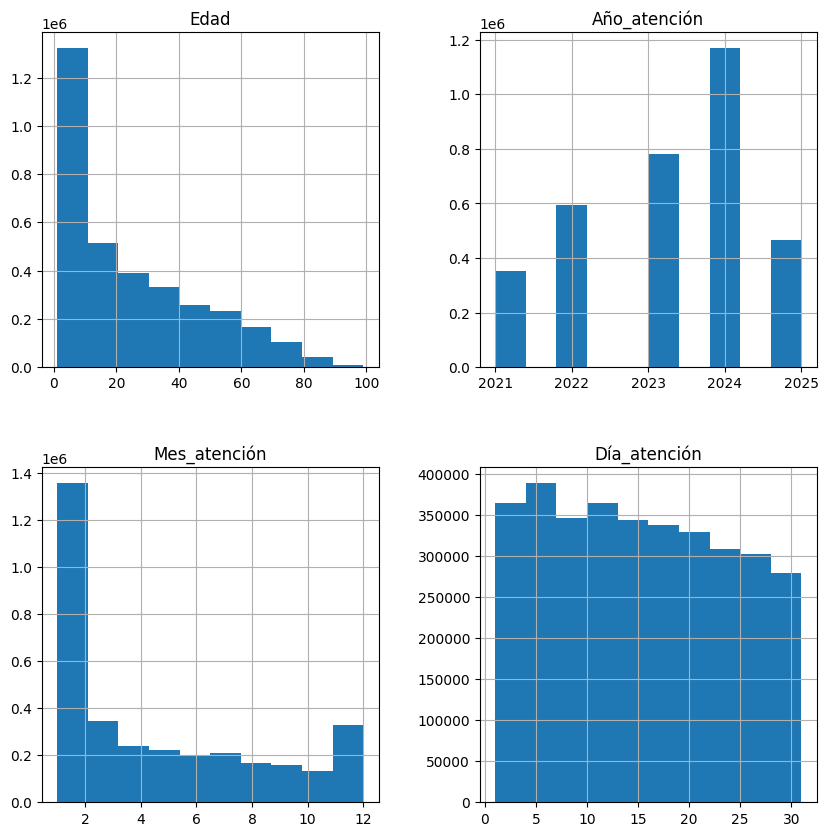

In [ ]:
df_tira.hist(figsize=(10,10))
plt.show()

De acuerdo a los histogramas  mostradas, se evidencia lo siguiente:

**1. Distribución de la Edad:**
 Se observa una cola hacia la derecha, lo que indica que la frecuencia de casos disminuye a medida que la edad aumenta. Este patrón sugiere que los grupos más jóvenes son los más afectados.

**2. Distribución del Año de Atención:**
Se evidencia que la mayor cantidad de registros se da en 2024, con un segundo pico en 2023.

**3. Distribución del Mes de Atención:**
El mes con mayor número de atenciones es febrero, lo que podría indicar un pico estacional de infecciones respiratorias. La distribución muestra una disminución progresiva de casos a medida que avanzan los meses.

**4. Distribución del Día de Atención:**
Los datos muestran una distribución bastante homogénea de las atenciones a lo largo del mes, con una ligera disminución hacia los últimos días.



- Realizamos diagramas de cajas para revisar la distribución de cada variable cuantitativa

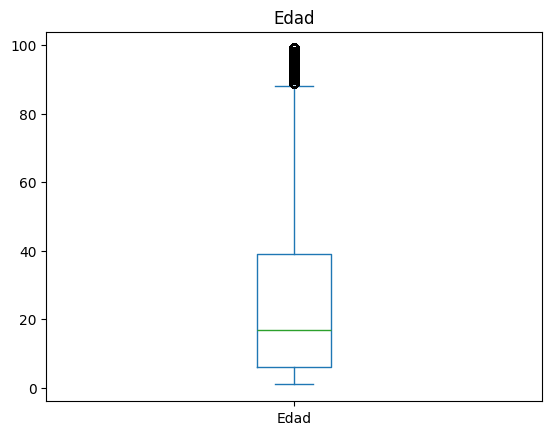

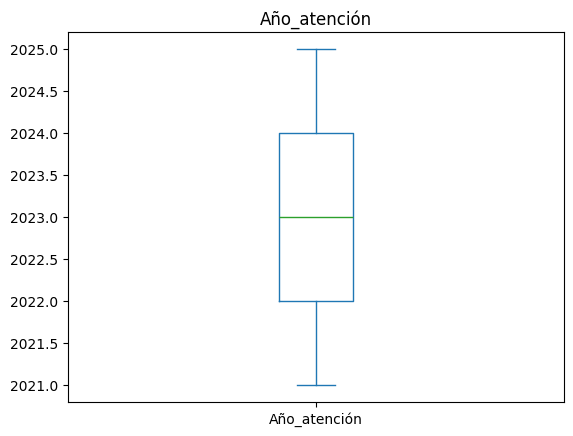

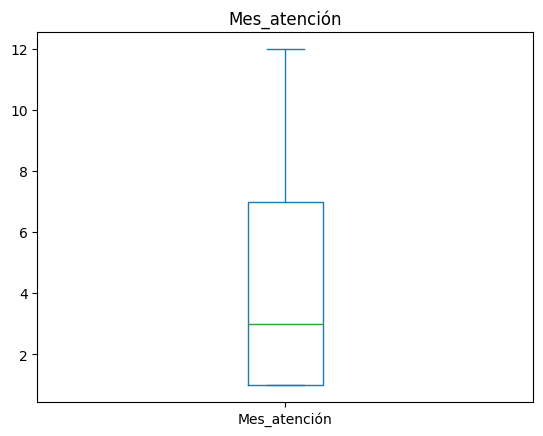

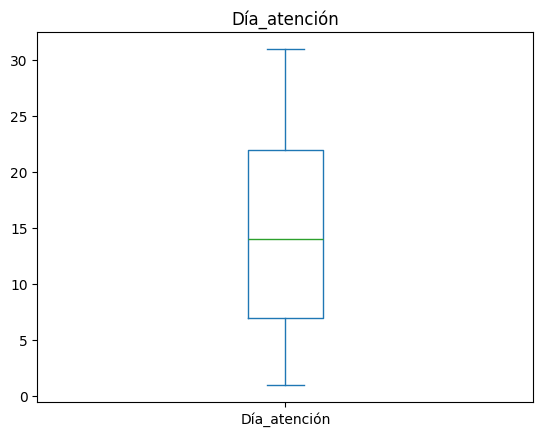

In [ ]:
# realizamos diagramas de cajas para revisar la distribución de cada variable cuantitativa
for var in lista_cuantitativas:
  df_tira[var].plot(kind='box', title=var)
  plt.show()

A continuación, se presenta la interpretación de los diagramas de caja (box plots) de cada una de las variables:

1. Edad
  - Se puede observar que la caja está centrada en torno a los valores bajos (aproximadamente entre 0 y 40), con una ligera asimetría positiva, lo que indica que la mayoría de los pacientes son más jóvenes.
  - Varios posibles datos atípicos en la parte superior
2. Año de atención
  -  La caja está bastante centrada entre los años 2022 y 2024, con una distribución bastante uniforme en esos años. La asimetría positiva en los valores más altos del rango sugiere que hay más registros en los años más cercanos a 2024.
3. Mes de atención
  - El gráfico muestra que la mayoría de los casos están en febrero, con una caja ubicada en los meses 1 a 4. Existe una asimetría positiva, lo que sugiere que la incidencia disminuye a medida que avanzan los meses.
4. Día de atención
  - La caja está centrada entre el día 5 y 22, lo que indica una distribución bastante homogénea. La asimetría es pequeña, lo que sugiere que no hay una concentración clara en días específicos.

### Revisando las variables explicactivas cualitativas:

#### 1. Variable Sexo

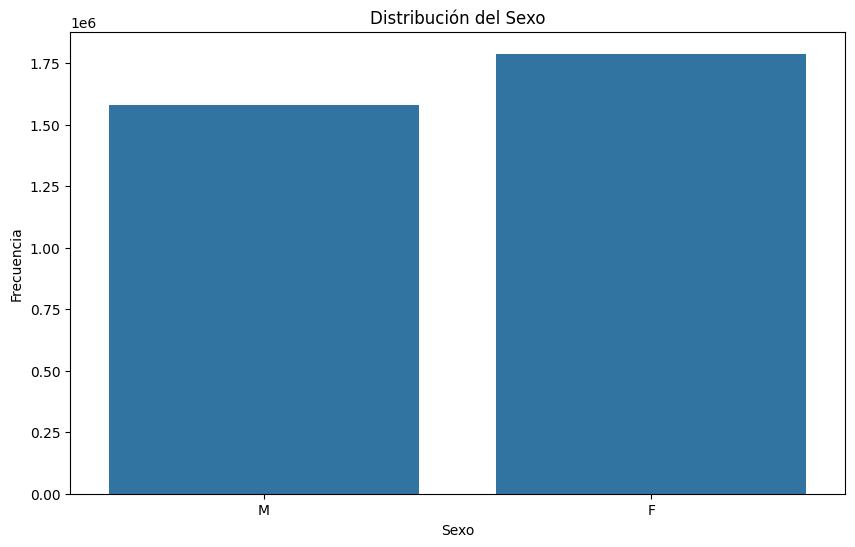

In [ ]:
# realizamos diagramas de barras para revisar la distribución de frecuencias de cada variable cualitativa
plt.figure(figsize=(10, 6))
sns.countplot(x='Sexo', data=df_tira)
plt.title('Distribución del Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

El gráfico de barras muestra una distribución relativamente equilibrada entre los géneros masculino (M) y femenino (F), con ambos presentando una frecuencia similar, cerca de 1.5 millones de registros cada uno. Esto sugiere que las infecciones respiratorias agudas afectan de manera equilibrada a ambos sexos en el conjunto de datos analizado.

#### 2. Tipo de Edad

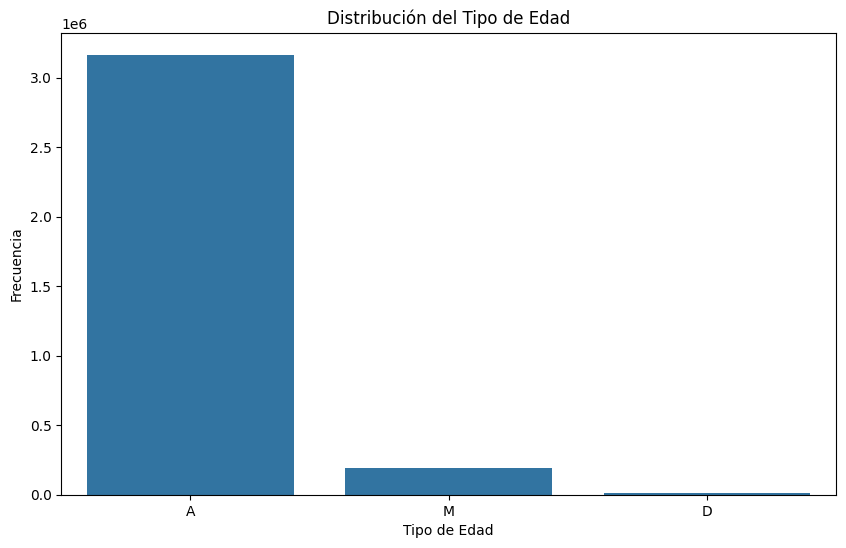

In [ ]:
# Gráfico de barras para la variable 'Tipo_edad'
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo_edad', data=df_tira)
plt.title('Distribución del Tipo de Edad')
plt.xlabel('Tipo de Edad')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra una gran concentración en el tipo de edad A (Año), con más de 3 millones de registros, mientras que los tipos de edad M (Mes) y D (Día) tienen una frecuencia mucho más baja. Esto sugiere que los datos están mayormente agrupados por el tipo de edad año, con menos registros correspondientes a meses y días

#### 3. Variable Diagnóstico

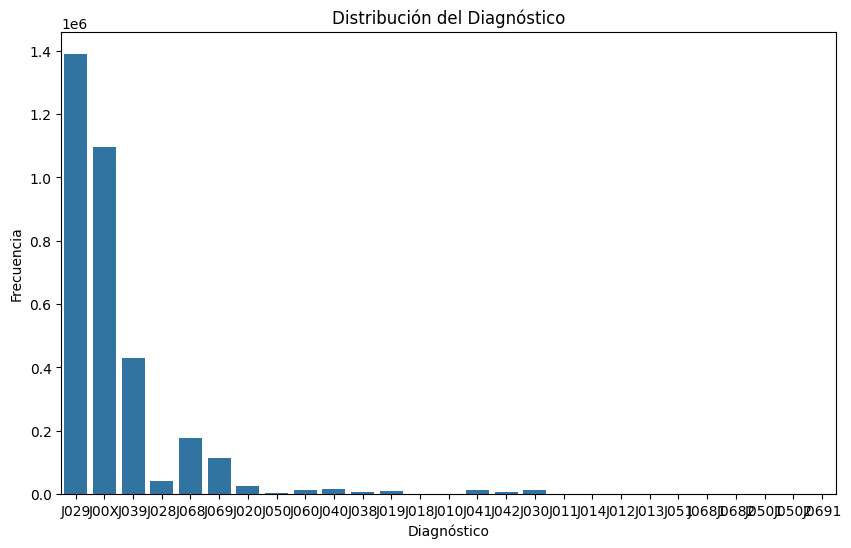

In [ ]:
# Gráfico de barras para la variable 'Diagnóstico'
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnostico', data=df_tira)
plt.title('Distribución del Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

El gráfico de barras muestra una distribución altamente sesgada con un pico pronunciado en el diagnóstico J029 (Faringitis aguda no especificada). Esta categoría tiene la frecuencia más alta (alrededor de 1.4 millones de registros), seguida por J00X(Nasofaringitis aguda-Resfriado común) y J039(Faringitis aguda no especificada). La mayoría de los demás diagnósticos tienen una frecuencia mucho más baja, lo que indica que ciertas condiciones respiratorias predominan en los registros.

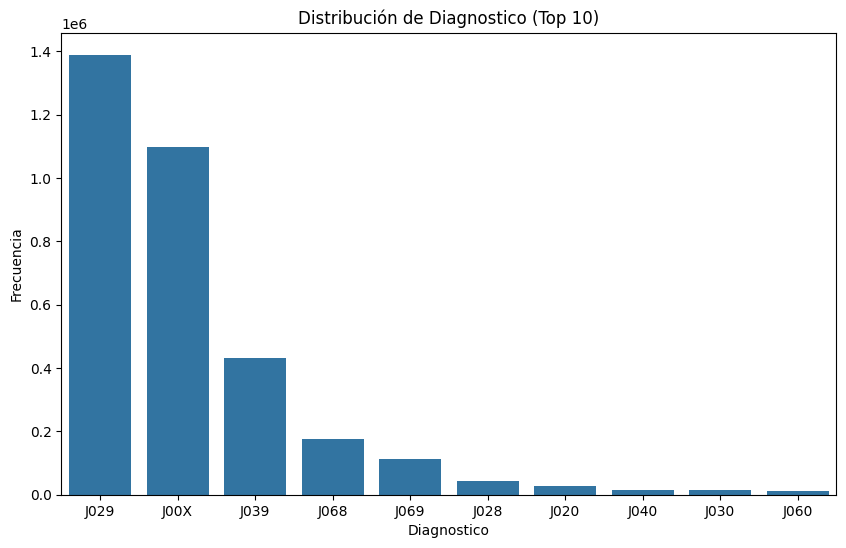

In [ ]:

# Obtener el top 10 más frecuentes
top_eess = df_tira['Diagnostico'].value_counts().nlargest(10)

# Filtrar el DataFrame solo para esos id_eess (haciendo copia)
df_top = df_tira[df_tira['Diagnostico'].isin(top_eess.index)].copy()

# Convertir la columna en categórica con el orden deseado
df_top['Diagnostico'] = pd.Categorical(df_top['Diagnostico'], categories=top_eess.index, ordered=True)

# Graficar ordenado
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnostico', data=df_top, order=top_eess.index)
plt.title('Distribución de Diagnostico (Top 10)')
plt.xlabel('Diagnostico')
plt.ylabel('Frecuencia')
plt.show()

- Se observa que el diagnóstico con más casos reportados es J029 (Faringitis aguda no especificada) destacándose significativamente sobre los demás diagnósticos.

- Le siguen en frecuencia J00X (Resfriado común-Nasofaringitis aguda) y J039 (Faringitis aguda no especificada), con una alta prevalencia en los registros.

- A continuación, los diagnósticos como J028(Faringitis aguda debida a otros microorganismos especificados), J068(Otras infecciones respiratorias agudas) y J069 (Infección respiratoria aguda no especificada) presentan una frecuencia considerablemente más baja.

- Por último, se observan los diagnósticos menos comunes como J020(Faringitis
estreptocócica), J060(Laringitis aguda), J040 (Laringitis y traqueítis agudas) y J030 (Amigdalitis aguda) que tienen una frecuencia reducida en los registros.

#### 4. Variable Tipo de Diagnóstico

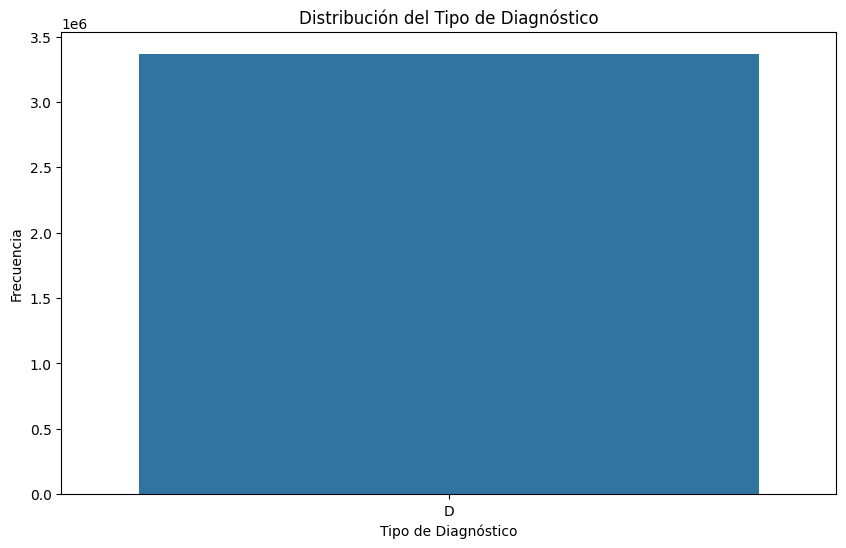

In [ ]:
# Gráfico de barras para la variable 'Tipo_Dx'
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo_Dx', data=df_tira)
plt.title('Distribución del Tipo de Diagnóstico')
plt.xlabel('Tipo de Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

- El gráfico muestra la distribución del Tipo de Diagnóstico y se observa que toda la frecuencia está en la categoría "D", que corresponde al diagnóstico Definitivo.
- Esto sugiere que en los datos que se están analizando, todos los diagnósticos reportados son definitivos, sin presencia de diagnósticos presuntivos o repetidos.
- Dado que no hay variabilidad en esta variable, se podría considerar que la columna no aporta nueva información si todos los registros son del mismo tipo de diagnóstico, y podría eliminarse para simplificar el análisis, ya que no genera diferenciación en los datos.

#### 5. Variable Id_Ubigeo

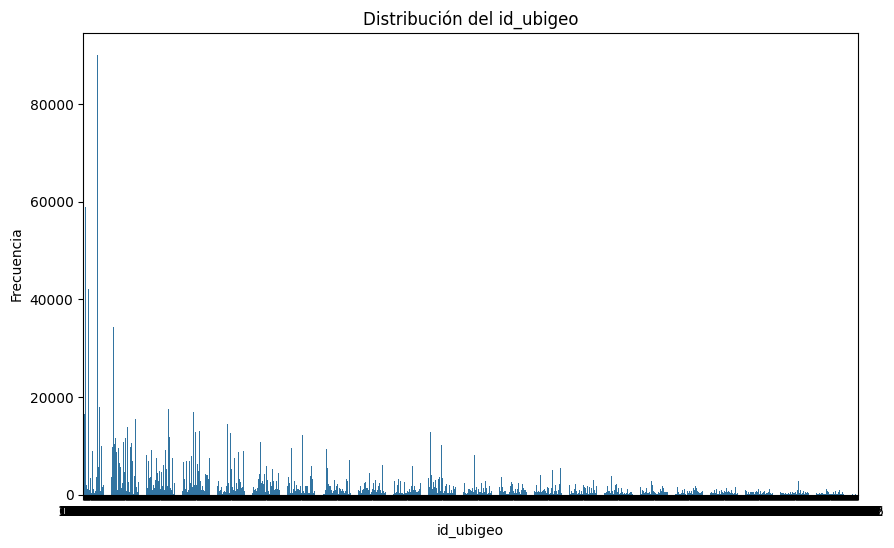

In [ ]:
# Gráfico de barras para la variable 'id_ubigeo'
plt.figure(figsize=(10, 6))
sns.countplot(x='id_ubigeo', data=df_tira)
plt.title('Distribución del id_ubigeo')
plt.xlabel('id_ubigeo')
plt.ylabel('Frecuencia')
plt.show()

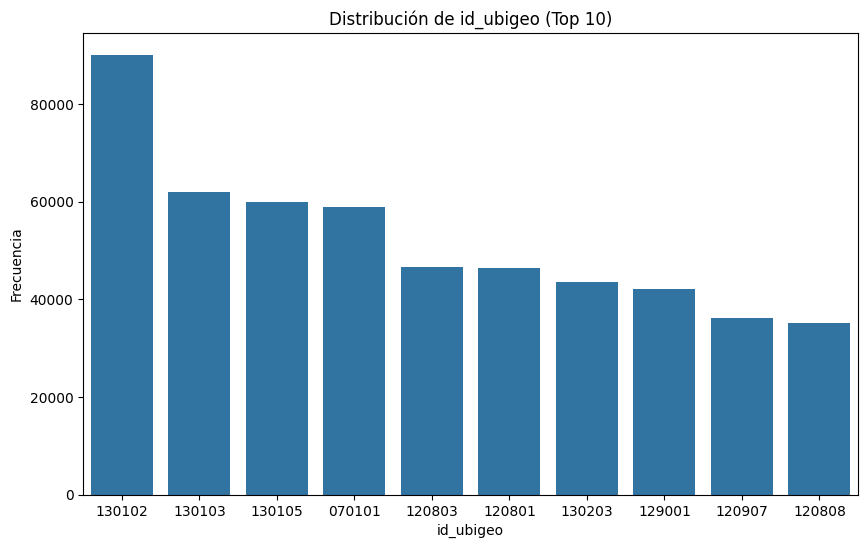

In [ ]:
# Obtener el top 10 más frecuentes
top_eess = df_tira['id_ubigeo'].value_counts().nlargest(10)

# Filtrar el DataFrame solo para esos id_eess (haciendo copia)
df_top = df_tira[df_tira['id_ubigeo'].isin(top_eess.index)].copy()

# Convertir la columna en categórica con el orden deseado
df_top['id_ubigeo'] = pd.Categorical(df_top['id_ubigeo'], categories=top_eess.index, ordered=True)

# Graficar ordenado
plt.figure(figsize=(10, 6))
sns.countplot(x='id_ubigeo', data=df_top, order=top_eess.index)
plt.title('Distribución de id_ubigeo (Top 10)')
plt.xlabel('id_ubigeo')
plt.ylabel('Frecuencia')
plt.show()


**Descripción:**

Se observa lo siguiente:

- El distrito El Porvenir (130102), ubicado en la provincia de Trujillo, departamento de La Libertad, registra la mayor frecuencia de casos, con más de 90,000 atenciones por infecciones respiratorias agudas (IRA).

- Le siguen Florencia de Mora (130103) y La Esperanza (130105), ambos también en la provincia de Trujillo, con frecuencias cercanas a los 60,000 registros cada uno.

- Otro distrito destacado es Callao (070101), con cerca de 59,000 casos, una cifra significativa dado que es un área densamente poblada.

- También destacan distritos del departamento de Junín, como Huay-Huay (120803), La Oroya (120801), San Juan de Jarpa (120907), y Santa Rosa de Sacco (120808), que aunque tienen poblaciones pequeñas, presentan altas frecuencias relativas.

- En general, los distritos del departamento de La Libertad (especialmente Trujillo) concentran una parte importante de los registros, lo cual puede reflejar condiciones urbanas, densidad poblacional y capacidad de atención sanitaria.

**Interpretación:**
- El distrito El Porvenir presenta una clara concentración de casos, lo que podría estar relacionado con factores como alta densidad poblacional, urbanización acelerada, o presencia de focos de contagio. Sería recomendable priorizar esta zona en términos de fortalecimiento de infraestructura sanitaria, campañas de prevención y monitoreo continuo.

- Los otros distritos de Trujillo como Florencia de Mora y La Esperanza también reportan volúmenes importantes de atención por IRA, lo que sugiere que todo el corredor metropolitano de Trujillo podría ser considerado como un área crítica o prioritaria.

- Por otro lado, en el departamento de Junín, destacan distritos rurales o mineros con poblaciones pequeñas (menos de 15,000 habitantes), pero con alta frecuencia de casos, lo que sugiere la necesidad de intervenciones específicas adaptadas a su contexto: acceso geográfico, contaminación ambiental (por ejemplo, en La Oroya), y condiciones climáticas.

- La situación del Callao, siendo un distrito costero densamente poblado, refuerza la importancia de monitorear áreas urbanas con fuerte movilidad humana.




Para un mejor entendimiento del comportamiento territorial de los casos registrados, se desarrolló un mapa interactivo que muestra los 10 distritos con mayor frecuencia de registros. Esta visualización se logró gracias a la integración del dataset de Ubigeo, previamente cargado, el cual aporta datos clave como nombres de distrito, provincia, departamento, población, superficie y coordenadas geográficas.

In [ ]:
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import display

# 1. Asegurarnos que el campo ubigeo en ambos sea string
df_tira['id_ubigeo'] = df_tira['id_ubigeo'].astype(str)
df_ubigeo['Ubigeo'] = df_ubigeo['Ubigeo'].astype(str)

# 2. Obtener top 10 ubigeos más frecuentes
top_ubigeo = df_tira['id_ubigeo'].value_counts().head(10)

# 3. Unir con df_ubigeo para obtener coordenadas y nombres
df_top_ubi = df_ubigeo[df_ubigeo['Ubigeo'].isin(top_ubigeo.index)].copy()
df_top_ubi['frecuencia'] = df_top_ubi['Ubigeo'].map(top_ubigeo)

# 4. Crear colormap
colormap = plt.colormaps['YlOrRd']
norm = colors.Normalize(vmin=df_top_ubi['frecuencia'].min(), vmax=df_top_ubi['frecuencia'].max())

# 5. Crear mapa base
mapa = folium.Map(location=[-9.2, -75], zoom_start=5.5)

# 6. Escalado para radios de los círculos
min_radio = 10
max_radio = 40

# 7. Agregar marcadores
for _, row in df_top_ubi.iterrows():
    valor = row['frecuencia']
    color = colormap(norm(valor))
    color_hex = colors.to_hex(color)

    radio = min_radio + (valor - df_top_ubi['frecuencia'].min()) * (max_radio - min_radio) / (df_top_ubi['frecuencia'].max() - df_top_ubi['frecuencia'].min())

    folium.CircleMarker(
        location=[row['Y'], row['X']],
        radius=radio,
        color="black",  # borde
        weight=3,
        fill=True,
        fill_color=color_hex,
        fill_opacity=0.95,
        popup=(f"<b>📍 {row['Distrito']}, {row['Provincia']}, {row['Departamento']}</b><br>"
               f"🔢 Frecuencia: {valor}<br>"
               f"👥 Población: {row['Poblacion']:,}<br>"
               f"🗺️ Superficie: {row['Superficie']} km²")
    ).add_to(mapa)


# 8. Mostrar el mapa
display(mapa)

 La transición desde un gráfico de barras estático hacia una visualización dinámica enriquece el análisis espacial, permitiendo identificar patrones territoriales y apoyar la toma de decisiones estratégicas con un enfoque más visual, intuitivo y territorialmente informado.

In [ ]:
# Mostrar los datos de los 10 ubigeos más frecuentes antes de graficar
print(df_top_ubi[['Ubigeo', 'Distrito', 'Provincia', 'Departamento', 'Poblacion', 'Superficie', 'Y', 'X', 'frecuencia']].to_string(index=False))


Ubigeo            Distrito Provincia Departamento  Poblacion  Superficie      Y      X  frecuencia
070101              Callao    Callao       Callao     410795       45.65 -12.06 -77.15       58843
120801            La Oroya     Yauli        Junin      12577      388.42 -11.52 -75.90       46472
120803           Huay-Huay     Yauli        Junin       1474      179.94 -11.72 -75.90       46690
120808 Santa Rosa de Sacco     Yauli        Junin      10413      101.09 -11.56 -75.95       35138
120907   San Juan de Jarpa   Chupaca        Junin       3597      137.02 -12.12 -75.44       36221
130102         El Porvenir  Trujillo  La Libertad     196333       36.70  -8.08 -79.00       90145
130103   Florencia de Mora  Trujillo  La Libertad      42978        1.99  -8.08 -79.02       61982
130105        La Esperanza  Trujillo  La Libertad     190881       15.55  -8.08 -79.05       59998
130203             Chocope    Ascope  La Libertad       9342       95.73  -7.79 -79.22       43560


Para complementar el análisis espacial, se generó un mapa de calor a partir de todos los registros del dataset principal. Esta visualización permite representar la distribución geográfica de los casos mediante gradientes de color, integrando coordenadas de ubicación provenientes del dataset de Ubigeo.

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Asegurar que id_ubigeo sea string
df_tira['id_ubigeo'] = df_tira['id_ubigeo'].astype(str)
df_ubigeo['Ubigeo'] = df_ubigeo['Ubigeo'].astype(str)

# 1. Contar frecuencia de cada ubigeo
frecuencias = df_tira['id_ubigeo'].value_counts().reset_index()
frecuencias.columns = ['Ubigeo', 'frecuencia']

# 2. Unir con df_ubigeo para obtener coordenadas
df_heat = pd.merge(frecuencias, df_ubigeo, on='Ubigeo', how='inner')

# 3. Crear lista de puntos: [latitud, longitud, peso]
puntos = df_heat[['Y', 'X', 'frecuencia']].values.tolist()

# 4. Crear mapa base centrado en Perú
mapa = folium.Map(location=[-9.2, -75], zoom_start=5.5)

# 5. Agregar capa de mapa de calor
HeatMap(puntos, radius=12, blur=15, max_zoom=6).add_to(mapa)

# 6. Mostrar mapa
display(mapa)


El mapa revela zonas con alta concentración de registros, especialmente en regiones densamente pobladas o con mayor actividad asistencial. Las áreas con tonalidades más cálidas (amarillo-rojo) indican mayor intensidad de casos, lo cual facilita la identificación de focos críticos y proporciona una perspectiva clara para la planificación de estrategias de intervención territorial.

#### 6. Variable Establecimiento de salud (id_eess)

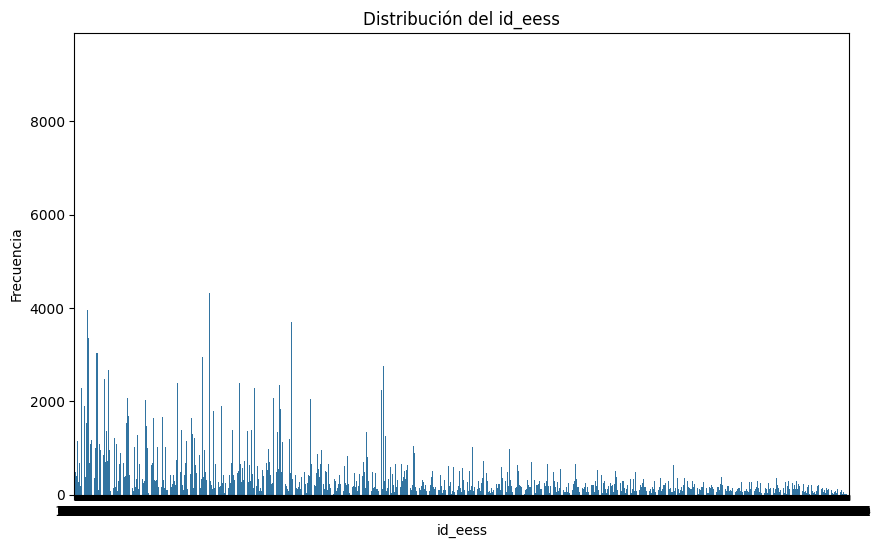

In [ ]:
# Gráfico de barras para la variable 'id_eess'
plt.figure(figsize=(10, 6))
sns.countplot(x='id_eess', data=df_tira)
plt.title('Distribución del id_eess')
plt.xlabel('id_eess')
plt.ylabel('Frecuencia')
plt.show()

Para conocer los establecimientos de salud con mayor actividad en el dataset, se construyó un gráfico de barras que muestra los 10 establecimientos (id_eess) con mayor número de registros.

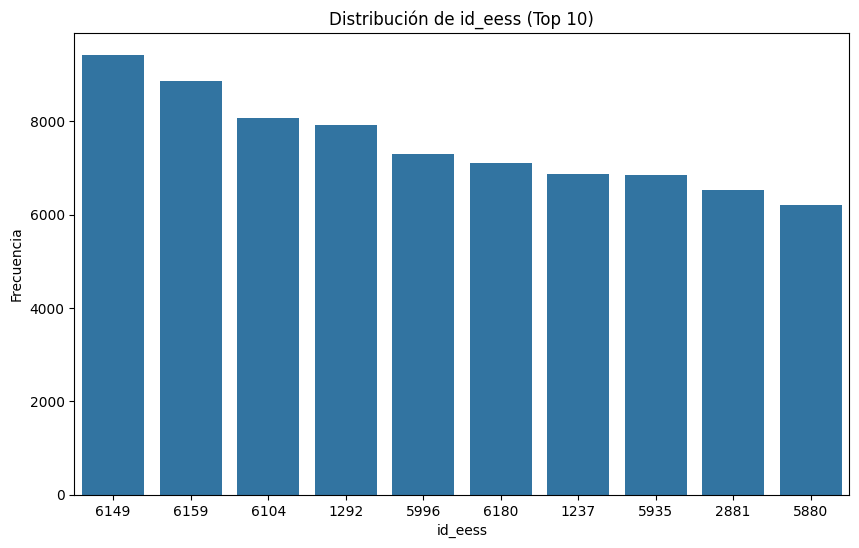

In [ ]:
# Obtener el top 10 más frecuentes
top_eess = df_tira['id_eess'].value_counts().nlargest(10)

# Filtrar el DataFrame solo para esos id_eess (haciendo copia)
df_top = df_tira[df_tira['id_eess'].isin(top_eess.index)].copy()

# Convertir la columna en categórica con el orden deseado
df_top['id_eess'] = pd.Categorical(df_top['id_eess'], categories=top_eess.index, ordered=True)

# Graficar ordenado
plt.figure(figsize=(10, 6))
sns.countplot(x='id_eess', data=df_top, order=top_eess.index)
plt.title('Distribución de id_eess (Top 10)')
plt.xlabel('id_eess')
plt.ylabel('Frecuencia')
plt.show()


El gráfico revela que los centros ubicados en Lima Metropolitana, como el Centro Materno Infantil José Carlos Mariátegui (id_eess = 6149) y el Centro de Emergencias San Pedro de los Chorrillos (id_eess = 6159), concentran el mayor número de registros. Esta concentración podría deberse a la alta densidad poblacional, accesibilidad o capacidad operativa de dichos centros. Asimismo, se observa la participación de otras regiones como Arequipa y Tacna, indicando un patrón distribuido pero con focos específicos de alta demanda. Esta información es clave para priorizar recursos y estrategias sanitarias por establecimiento.

In [ ]:
# Filtrar df_eess para obtener solo los establecimientos que están en el top de id_eess
# 1. Obtener top 10 más frecuentes
top_eess = df_tira['id_eess'].value_counts().nlargest(10)

# 2. Filtrar df_tira con esos top eess
df_top = df_tira[df_tira['id_eess'].isin(top_eess.index)].copy()

# 3. Asignar orden a 'id_eess' como categoría
df_top['id_eess'] = pd.Categorical(df_top['id_eess'], categories=top_eess.index, ordered=True)

# 4. Filtrar df_eess según top y mantener el orden del top
df_eess_top = df_eess[df_eess['id_eess'].isin(top_eess.index)].copy()
df_eess_top['id_eess'] = pd.Categorical(df_eess_top['id_eess'], categories=top_eess.index, ordered=True)
df_eess_top = df_eess_top.sort_values('id_eess')  # ordenar según top

# 5. Mostrar de forma legible
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 200)

print(df_eess_top[['id_eess', 'latitud', 'longitud', 'nombre', 'diresa', 'direccion']].to_string(index=False))


id_eess  latitud  longitud                                            nombre            diresa                                                                                                                              direccion
   6149   -12.15    -76.95    CENTRO MATERNO INFANTIL JOSE CARLOS MARIATEGUI    LIMA DIRIS SUR               AVENIDA SIMÓN BOLÍVAR ESQUINA JR. MARIANO NECOCHEA S/N DISTRITO VILLA MARIA DEL TRIUNFO PROVINCIA LIMA DEPARTAMENTO LIMA
   6159   -12.17    -77.02 CENTRO DE EMERGENCIAS SAN PEDRO DE LOS CHORRILLOS    LIMA DIRIS SUR                                                      CALLE FERROCARRIL NUMERO S/N DISTRITO CHORRILLOS PROVINCIA LIMA DEPARTAMENTO LIMA
   6104   -12.14    -76.96                  CENTRO MATERNO INFANTIL OLLANTAY    LIMA DIRIS SUR AVENIDA AV. PROLONGACION GABRIEL TORRES S/N. PAMPLONA ALTA NUMERO S/N DISTRITO SAN JUAN DE MIRAFLORES PROVINCIA LIMA DEPARTAMENTO LIMA
   1292   -16.38    -71.51                CENTRO DE SALUD EDIFICADORES MISTI    

Para enriquecer el análisis visual y territorial, se elaboró un mapa interactivo que geolocaliza los 10 establecimientos de salud con mayor número de registros.

In [ ]:
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import display

# Colormap más visible
colormap = plt.colormaps['YlOrBr']

# Crear mapa base centrado en Perú
mapa = folium.Map(location=[-6.23, -77.87], zoom_start=6.5)

# Top 10 establecimientos más frecuentes
top_ordenado = top_eess.sort_values(ascending=False).head(10)

# Filtrar los datos
df_top = df_eess[df_eess['id_eess'].isin(top_ordenado.index)].copy()
df_top['valor'] = df_top['id_eess'].map(top_ordenado)

# Normalización del color
norm = colors.Normalize(vmin=df_top['valor'].min(), vmax=df_top['valor'].max())

# Escalado de radios
min_radio = 10
max_radio = 40

# Añadir marcadores
for _, row in df_top.iterrows():
    valor = row['valor']
    color = colormap(norm(valor))
    color_hex = colors.to_hex(color)

    # Escalar radio según valor
    radio = min_radio + (valor - df_top['valor'].min()) * (max_radio - min_radio) / (df_top['valor'].max() - df_top['valor'].min())

    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=radio,
        color="black",  # borde
        weight=3,       # grosor del borde
        fill=True,
        fill_color=color_hex,
        fill_opacity=0.95,
        popup=(f"<b>🏥 {row['nombre']}</b><br>"
               f"🆔 ID: {row['id_eess']}<br>"
               f"🔢 Valor: {valor}<br>"
               f"📍 Dirección: {row['direccion']}<br>"
               f"🏛️ Diresa: {row['diresa']}")
    ).add_to(mapa)

# Mostrar mapa
display(mapa)


Asimismo, se elaboró un mapa de calor que representa la densidad de registros a nivel nacional. Este recurso visual fue posible gracias a la integración con el dataset georreferenciado, permitiendo identificar rápidamente zonas con mayor o menor concentración de registros.

In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# 1. Contar la frecuencia de cada establecimiento en df_tira
frecuencias = df_tira['id_eess'].value_counts()

# 2. Filtrar df_eess con esos id_eess
df_eess_filtrado = df_eess[df_eess['id_eess'].isin(frecuencias.index)].copy()
df_eess_filtrado['id_eess'] = df_eess_filtrado['id_eess'].astype(str)

# 3. Unir coordenadas y frecuencias
df_heatmap = df_eess_filtrado.merge(frecuencias.rename('peso'), left_on='id_eess', right_index=True)

# 4. Crear lista con coordenadas + peso
datos_heatmap = df_heatmap[['latitud', 'longitud', 'peso']].dropna().astype(float).values.tolist()

# 5. Crear el mapa centrado en Perú
mapa = folium.Map(location=[-9.19, -75.02], zoom_start=6)

# 6. Añadir HeatMap con pesos
HeatMap(
    data=datos_heatmap,
    radius=10,
    blur=15,
    min_opacity=0.4,
    max_zoom=7
).add_to(mapa)

# 7. Mostrar el mapa
display(mapa)


- A simple vista, el mapa refleja una amplia extensión teñida de color celeste, lo que sugiere que la mayoría de las zonas presentan una baja concentración de registros. Este color, distribuido en gran parte del territorio nacional, indica una carga asistencial moderada o baja.

- En contraste, se distinguen zonas con colores más intensos como el verde brillante y el amarillo. Estos puntos más cálidos se ubican principalmente en la ciudad de Lima y su periferia, donde se concentra la mayor actividad asistencial. También se observan algunas manchas destacadas en regiones como Arequipa y parte de la costa norte, aunque con menor intensidad.

###Visualización de Correlaciones entre Variables Cuantitativas

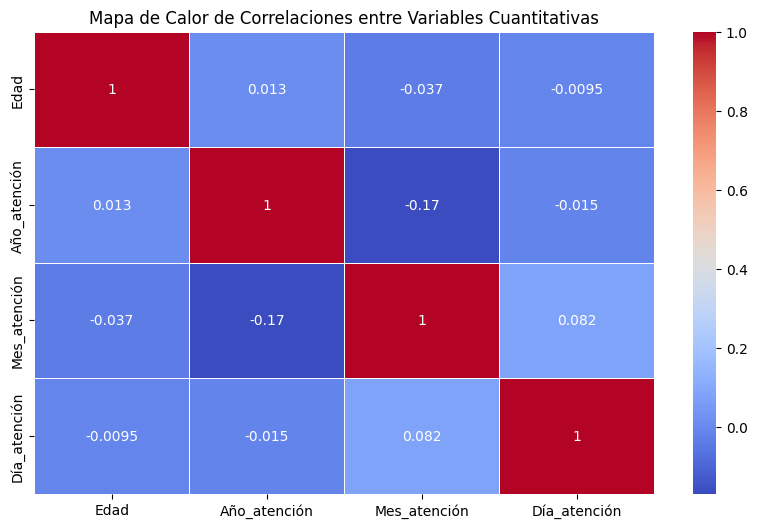

In [ ]:
# Mapa de calor de correlaciones entre las variables cuantitativas
correlation_matrix = df_tira[lista_cuantitativas].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables Cuantitativas')
plt.show()

**Descripción del gráfico:**
- El mapa de calor muestra la matriz de correlación entre las variables cuantitativas: Edad, Año_atención, Mes_atención y Día_atención. Los valores oscilan entre -1 y 1, donde 1 indica una correlación perfecta positiva, -1 una perfecta negativa, y 0 ausencia de correlación.

**Análisis:**
- Las correlaciones observadas son muy débiles o prácticamente nulas entre las variables, lo cual indica que no existe una relación lineal fuerte entre edad y las fechas de atención. La mayor correlación negativa es entre Año_atención y Mes_atención (-0.17).

- Esto sugiere que las variables cuantitativas analizadas actúan de forma independiente, sin evidenciar relaciones lineales relevantes entre sí. Desde un enfoque exploratorio (EDA), este resultado es útil para entender que no hay patrones temporales o etarios marcados que se relacionen directamente entre estas variables.

- Sin embargo, debido a la baja correlación, estas variables por sí solas no serían suficientes para construir modelos predictivos potentes, ya que no aportan señales fuertes de dependencia. Por tanto, su principal utilidad en este contexto queda en el análisis descriptivo y exploratorio, más que en aplicaciones de predicción o modelado estadístico avanzado.

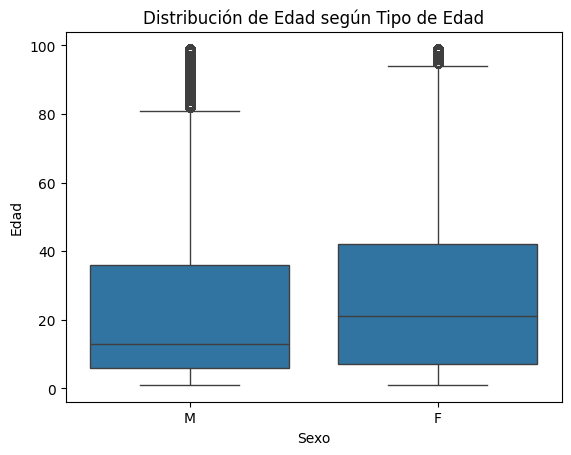

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_tira, x='Sexo', y='Edad')
plt.title("Distribución de Edad según Tipo de Edad")
plt.show()


**Descripción:**

- Muestra la distribución de edades para hombres (M) y mujeres (F).

- Ambas categorías presentan valores similares en términos de dispersión.

**Análisis:**

- Las mujeres tienen una mediana de edad ligeramente más alta que los hombres.

- Se observa una mayor variabilidad en las edades femeninas, con un rango intercuartílico más amplio.

- Ambos sexos presentan posibles valores atípicos (outliers), especialmente en edades avanzadas.



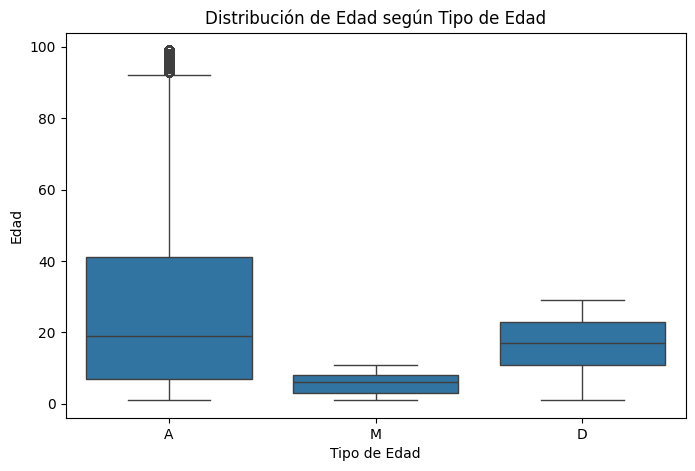

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_tira, x='Tipo_edad', y='Edad')
plt.title('Distribución de Edad según Tipo de Edad')
plt.xlabel('Tipo de Edad')
plt.ylabel('Edad')
plt.show()



**Análisis:**

- La mayoría de las edades registradas en años (A) muestran una gran dispersión con valores hasta más de 90.

- Las edades en meses (M) se concentran entre 0 y 12, como es esperable para lactantes.

- Las edades en días (D) van de 0 a 30 aproximadamente, y muestran un rango acotado.

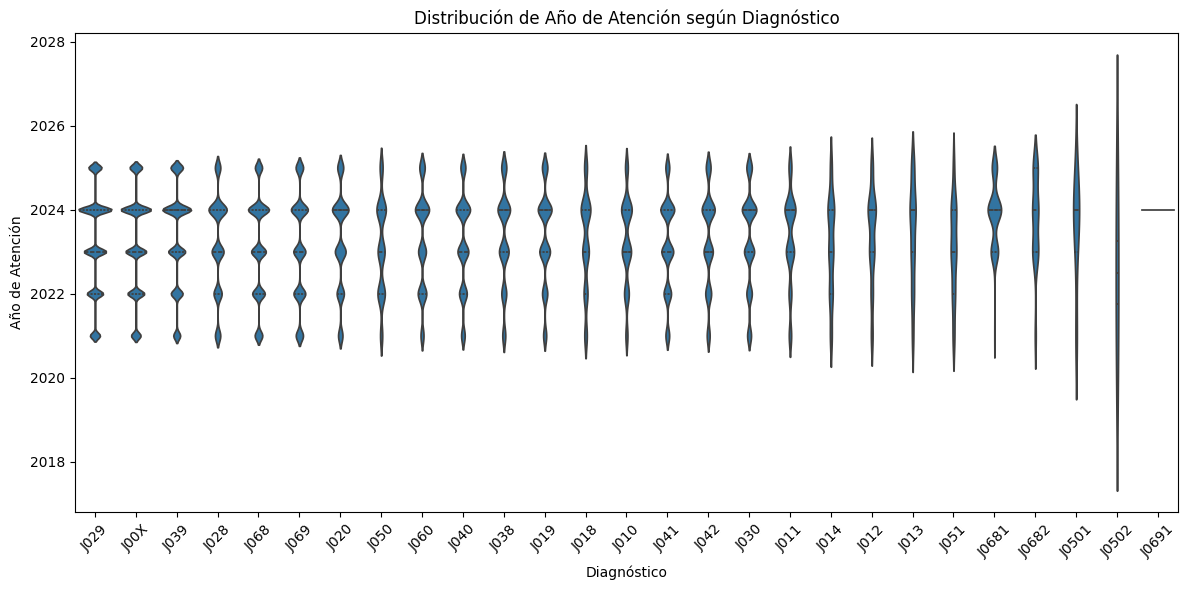

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_tira, x='Diagnostico', y='Año_atención', inner='quartile')
plt.xticks(rotation=45)
plt.title('Distribución de Año de Atención según Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Año de Atención')
plt.tight_layout()
plt.show()

**Análisis:**

- Se observa una distribución bastante concentrada entre los años 2022 y 2024 para la mayoría de los diagnósticos, lo cual sugiere que los registros están mayormente concentrados en ese periodo reciente.

- Algunos diagnósticos como J029, J00X, J093 muestran picos marcados en ciertos años específicos, lo que puede indicar una aparición más focalizada en el tiempo.

- Otros códigos, como J013, J051 o J0681, exhiben una mayor dispersión vertical, lo cual refleja registros más repartidos entre varios años.

- La distribución general muestra que no hay un diagnóstico con predominancia clara en años fuera del rango 2021–2025.

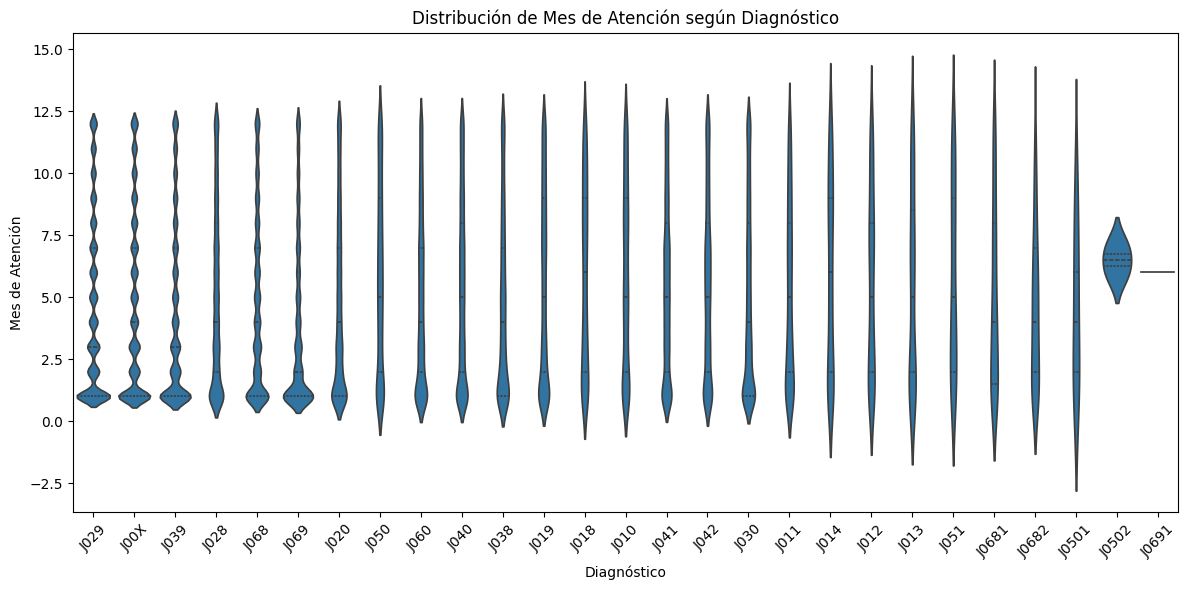

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_tira, x='Diagnostico', y='Mes_atención', inner='quartile')
plt.xticks(rotation=45)
plt.title('Distribución de Mes de Atención según Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Mes de Atención')
plt.tight_layout()
plt.show()

**Análisis:**

- Diagnósticos como **J029, J00X, J093, J066** muestran un **pico en enero y febrero**, lo cual sugiere una **estacionalidad** típica de enfermedades respiratorias agudas durante meses fríos.

- Diagnósticos como **J013, J0682, J0502** presentan una **distribución más amplia** durante el año, posiblemente por tratarse de condiciones **no estacionales** o con **seguimiento continuo**.

- Casos como **J014 o J012** mantienen una **distribución uniforme** en los 12 meses, lo que indicaría **presencia constante en la población** o patologías **endémicas**.

>  Este patrón puede relacionarse con factores climáticos, campañas de salud o características propias de cada enfermedad.

##Análisis de Valores Atípicos y Comportamientos Inesperados

### Posibles valores atípicos de la variable edad

Para identificar posibles valores atípicos, se aplicó el método del rango intercuartílico (IQR). Se detectaron registros fuera del rango esperado, observándose anterioremente en los boxplots como puntos aislados.


In [ ]:
# Detectar valores atípicos en la variable Edad
Q1 = df_tira['Edad'].quantile(0.25)
Q3 = df_tira['Edad'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites superior e inferior para detectar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers_edad = df_tira[(df_tira['Edad'] < limite_inferior) | (df_tira['Edad'] > limite_superior)]

print("Valores atípicos en la Edad:")
print(outliers_edad.head(20))

Valores atípicos en la Edad:
      id_persona  Edad Tipo_edad Sexo id_ubigeo Diagnostico Tipo_Dx id_eess  Año_atención  Mes_atención  Día_atención
193     41996479    91         A    F    120808        J00X       D    5988          2023            11            21
932     42246978    95         A    M    070902        J00X       D    2525          2024             4            25
1132    41106951    89         A    F    100201        J00X       D    3443          2023             7            27
4675    41300697    97         A    F    030307        J029       D    1245          2024             1             2
5940    36185208    96         A    F    130202        J00X       D    7244          2021             2            10
7382    40461037    99         A    F    100208        J00X       D    3478          2022             6            28
9098    40536459    91         A    F    120507        J00X       D    4353          2022            12            21
9120    40542026    91     

 **Interpretación**
- Los valores extremos identificados en la variable Edad corresponden principalmente a personas adultas mayores, con edades entre 85 y 99 años.

- Estos registros no representan errores ni inconsistencias; por el contrario, reflejan la presencia real de un grupo etario especialmente vulnerable frente a enfermedades respiratorias agudas.

- Dada su condición, este segmento de la población suele requerir atención médica frecuente, por lo que su aparición como “atípicos” responde más a un patrón clínico que a una anomalía estadística.

- Eliminar estos registros podría introducir un sesgo significativo en el análisis, al excluir a una de las poblaciones con mayor riesgo y demanda asistencial, perder patrones importantes en los extremos del ciclo de vida y comprometer la representatividad del estudio.

**Recomendaciones**
- Se recomienda conservar estos casos para mantener la validez del análisis, especialmente en estudios orientados a políticas de salud pública.

- Si se requiere un análisis más específico, aplicar segmentaciones por rango etario u otras técnicas que integren adecuadamente estos extremos sin distorsionar los resultados.



### Comportamiento Inesperado de la variable Tipo_Dx

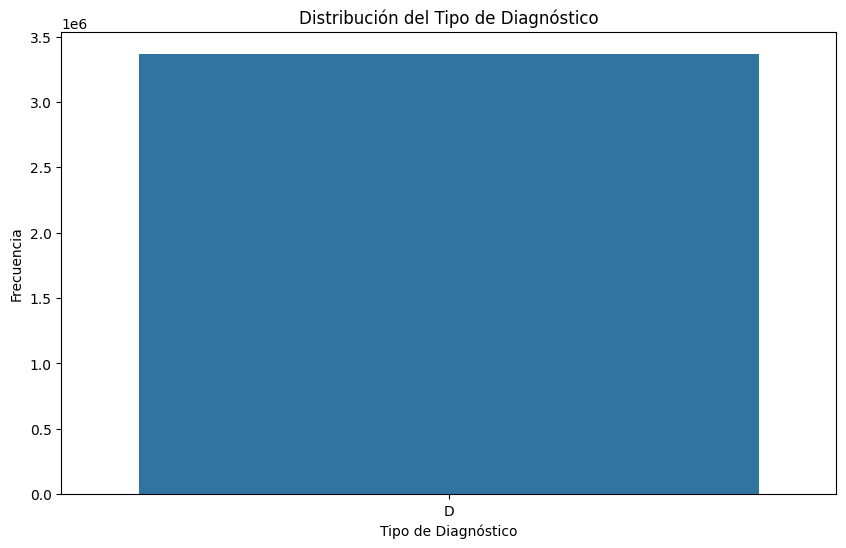

In [ ]:
# Gráfico de barras para la variable 'Tipo_Dx'
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo_Dx', data=df_tira)
plt.title('Distribución del Tipo de Diagnóstico')
plt.xlabel('Tipo de Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación:**
- El gráfico evidencia que todos los registros corresponden al diagnóstico definitivo ("D"), sin presencia de diagnósticos presuntivos ("P") o repetidos ("R"), los cuales suelen ser comunes en registros clínicos.

- La falta de variabilidad en esta variable la convierte en una constante, lo que significa que no aporta valor explicativo a modelos o análisis exploratorios, ya que no permite distinguir entre subgrupos.

**Recomendaciones**

- Dado que no aporta diferenciación entre casos, esta variable puede eliminarse del análisis para simplificar el dataset. Solo debería conservarse si se busca analizar la calidad o consistencia del registro clínico.

#  Hallazgos clave del Análisis Exploratorio (EDA):  


## *Composición demográfica y clínica*

* **Alta carga pediátrica:** El grupo más afectado corresponde a niños menores de 5 años. Esto se confirma por la distribución de edad, donde la categoría "AÑO" domina, pero también se evidencian registros en "MES" y "DIA", lo que indica afectación desde edades muy tempranas.

* **Distribución por sexo equilibrada:** Aunque existen ligeras variaciones, los casos están distribuidos casi equitativamente entre hombres y mujeres, sin una tendencia marcada por género.

## *Dimensiones temporales*
* **Estacionalidad parcial:** Los casos muestran variaciones mensuales y trimestrales, lo que sugiere un patrón estacional. Aumentos en periodos fríos podrían estar vinculados a la mayor circulación de virus respiratorios.

* **Tendencias de atención por año y mes:** Existen diferencias en la carga de atención médica a lo largo del tiempo, lo cual podría estar vinculado a eventos como campañas de vacunación, pandemias o estacionalidad.

## *Diagnóstico y calidad de registro*
* **Predominio de diagnósticos presuntivos:** Un alto porcentaje de diagnósticos está clasificado como “presuntivo”, lo cual refleja una potencial debilidad en la confirmación clínica o en el acceso a herramientas diagnósticas.

* **Variedad en códigos CIEX:** Se identifican múltiples códigos dentro del rango J00-J06, lo que confirma una diversidad de etiologías dentro de las infecciones respiratorias agudas
---
#  Implicancias para decisiones estratégicas:

## *Salud pública y políticas preventivas*
* **Focalización etaria:** Diseñar campañas específicas para niños pequeños, especialmente en periodos de alta transmisión.

* **Inversión diagnóstica:** Mejorar el acceso a herramientas para diagnóstico definitivo, evitando el sobreuso de diagnósticos presuntivos.

* **Calendario de intervenciones estacionales:** Aplicar medidas intensivas en meses de mayor incidencia (por ejemplo, refuerzo de vacunación o promoción de higiene respiratoria en estaciones frías).

## *Gestión sanitaria:*
* **Distribución de recursos según carga asistencial:** Identificar establecimientos con mayor carga de atención y evaluar su equipamiento y personal.

* **Establecimientos de referencia:** Promover mejoras en los ejes de referencia para pacientes complejos en zonas con limitaciones.


---


##  Recomendaciones clave

- Estandarizar los valores en las variables categóricas antes del análisis (por ejemplo, convertir todas las edades a una única unidad).

- Incorporar variables contextuales externas (clima, calidad del aire, nivel socioeconómico) para enriquecer el análisis.

- Implementar validaciones de entrada en los sistemas de recolección para evitar datos nulos y duplicados.

